# Tổng hợp

Hãy xây dựng mô hình phân lớp nhị phân với các yêu cầu sau:
* Đọc dữ liệu từ tập dữ liệu `winequality-red`(1đ)
* Trực quan dữ liệu: thống kê dữ liệu theo "quality" và vẽ biểu đồ nhiệt heatmap (2đ)
* Xây dựng mô hình huấn luyện với giải thuật Logistic Regression sử dụng sklearn với tập dữ liệu chia thành train và test với tỉ lệ 8-2 
    * mỗi lần học chỉ chọn 1 thuộc tính duy nhất (chọn 3 thuộc tính để làm), giải thích lý do em chọn (3đ)
    * học với tất cả thuộc tính (3đ)
* Thực hiện đánh gía qua các chỉ số Accuracy, Confusion Matrix, Classification_Report trên tập `test` với mô hình học tất cả thuộc tính (1đ)

In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore

dataF = np.genfromtxt('winequality-red.csv', dtype=float, delimiter=',', skip_header=1)

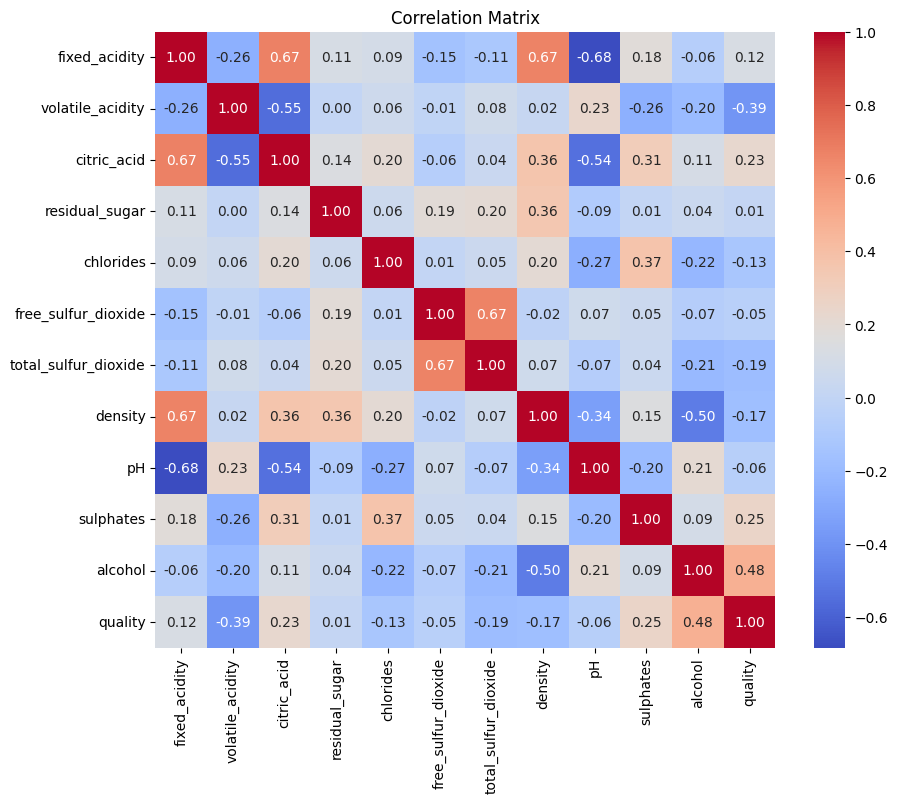

In [5]:
# Chuyển dữ liệu thành pandas DataFrame và đặt tên cho các cột (theo các cột trong winequality-red.csv)
columns = [
    "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", 
    "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"
]
dataF = pd.DataFrame(dataF, columns=columns)

# Tính ma trận tương quan
corr_matrix = dataF.corr()

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

quality
3     10
4     53
5    681
6    638
7    199
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1992\2605317620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


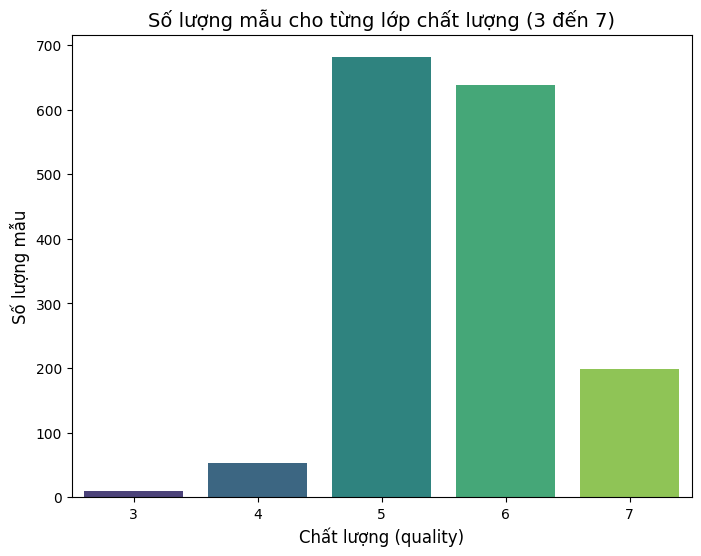

In [30]:
# Chuyển cột 'quality' thành kiểu số nguyên (nếu cần)
dataF['quality'] = dataF['quality'].astype(int)

# Lọc ra các lớp từ 3 đến 7
filtered_data = dataF[dataF['quality'].between(3, 7)]

# Thống kê số lượng mẫu cho từng lớp trong 'quality'
class_counts = filtered_data['quality'].value_counts().sort_index()

print(class_counts)
# Vẽ biểu đồ cột (bar plot)
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Số lượng mẫu cho từng lớp chất lượng (3 đến 7)', fontsize=14)
plt.xlabel('Chất lượng (quality)', fontsize=12)
plt.ylabel('Số lượng mẫu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [44]:
# Giả sử bạn đã có DataFrame 'dataF' với cột 'quality'
# Nhóm các giá trị của quality thành 2 lớp (0 và 1)
dataF['quality_grouped'] = dataF['quality'].map(lambda x: 0 if x in [3, 4, 5] else 1)

# Chia dữ liệu thành X (input) và y (output)
X = dataF.iloc[:, :11]  # Chọn tất cả các cột trừ cột cuối cùng
y = dataF['quality_grouped']   # Chọn cột cuối cùng làm nhãn (quality)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em chọn 3 cột là alcohol, volatile_acidity và citric_acid vì khi vẽ ma trận tương quan lên thì có 3 cột đó có giá trị lần lượt là 0.48, 0.39, 0.23 là gần như có mối liên hệ mạnh mẽ với cột quality nên em chọn 3 cột đó để train 

In [45]:
# Huấn luyện với từng thuộc tính riêng biệt (chọn 3 thuộc tính alcohol, volatile_acidity, citric_acid)
selected_columns = ["alcohol"] 
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với từng thuộc tính
log_reg.fit(X_train_selected, y_train)
y_pred_selected = log_reg.predict(X_test_selected)
    
# Đánh giá mô hình
accuracy_selected = accuracy_score(y_test, y_pred_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

# In kết quả cho mô hình với 3 thuộc tính
print(f"Accuracy (selected attributes): {accuracy_selected:.2f}")
print("Confusion Matrix (selected attributes):")
print(cm_selected)
print("Classification Report (selected attributes):")
print(report_selected)


Accuracy (selected attributes): 0.72
Confusion Matrix (selected attributes):
[[111  30]
 [ 61 118]]
Classification Report (selected attributes):
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       141
           1       0.80      0.66      0.72       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.73      0.72      0.72       320



In [46]:
# Huấn luyện với từng thuộc tính riêng biệt (chọn 3 thuộc tính alcohol, volatile_acidity, citric_acid)
selected_columns = ["volatile_acidity"] 
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với từng thuộc tính
log_reg.fit(X_train_selected, y_train)
y_pred_selected = log_reg.predict(X_test_selected)

# Đánh giá mô hình
accuracy_selected = accuracy_score(y_test, y_pred_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

# In kết quả cho mô hình với 3 thuộc tính
print(f"Accuracy (selected attributes): {accuracy_selected:.2f}")
print("Confusion Matrix (selected attributes):")
print(cm_selected)
print("Classification Report (selected attributes):")
print(report_selected)


Accuracy (selected attributes): 0.67
Confusion Matrix (selected attributes):
[[ 85  56]
 [ 50 129]]
Classification Report (selected attributes):
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       141
           1       0.70      0.72      0.71       179

    accuracy                           0.67       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.67      0.67      0.67       320



In [47]:
# Huấn luyện với từng thuộc tính riêng biệt (chọn 3 thuộc tính alcohol, volatile_acidity, citric_acid)
selected_columns = ["citric_acid"] 
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Xây dựng mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với từng thuộc tính
log_reg.fit(X_train_selected, y_train)
y_pred_selected = log_reg.predict(X_test_selected)

# Đánh giá mô hình
accuracy_selected = accuracy_score(y_test, y_pred_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

# In kết quả cho mô hình với 3 thuộc tính
print(f"Accuracy (selected attributes): {accuracy_selected:.2f}")
print("Confusion Matrix (selected attributes):")
print(cm_selected)
print("Classification Report (selected attributes):")
print(report_selected)


Accuracy (selected attributes): 0.62
Confusion Matrix (selected attributes):
[[ 72  69]
 [ 53 126]]
Classification Report (selected attributes):
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       141
           1       0.65      0.70      0.67       179

    accuracy                           0.62       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.62      0.62      0.62       320



In [48]:
# Giả sử dataF là DataFrame đã có sẵn với các cột quality_grouped và các thuộc tính khác
# Chia dữ liệu thành X (input) và y (output)
X = dataF.iloc[:, :11]  # Tất cả các cột trừ 'quality_grouped'
y = dataF['quality_grouped']  # Cột 'quality_grouped' làm nhãn (output)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình với tất cả các thuộc tính
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_all = model_all.predict(X_test)

# Đánh giá mô hình
accuracy_all = accuracy_score(y_test, y_pred_all)
conf_matrix_all = confusion_matrix(y_test, y_pred_all)
class_report_all = classification_report(y_test, y_pred_all)

# In kết quả đánh giá
print('Kết quả mô hình với tất cả các thuộc tính:')
print(f'Độ chính xác: {accuracy_all:.2f}')
print(f'Ma trận nhầm lẫn:\n{conf_matrix_all}')
print(f'Báo cáo phân loại:\n{class_report_all}')

Kết quả mô hình với tất cả các thuộc tính:
Độ chính xác: 0.74
Ma trận nhầm lẫn:
[[107  34]
 [ 49 130]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



**Lưu ý:** 
* file notebook phải có kết quả chạy nếu ko xem như chưa làm
* lưu tên file theo cú pháp MSSV_HOTEN.ipynb